Shape of X: (1797, 64)
Shape of y: (1797,)


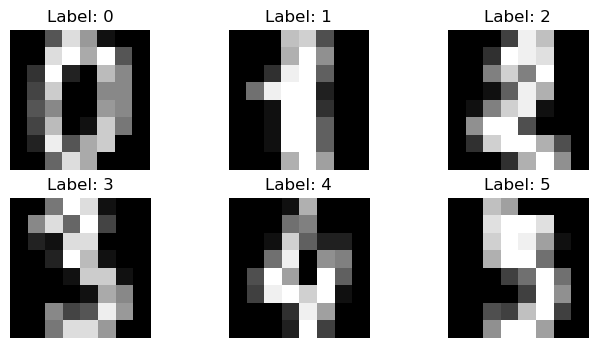

Accuracy with K=3: 0.9694444444444444
Accuracies: {3: 0.9694444444444444, 5: 0.975, 7: 0.9722222222222222, 9: 0.9722222222222222}


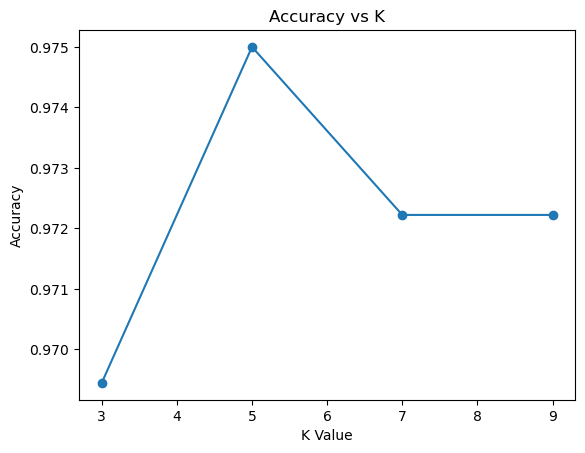

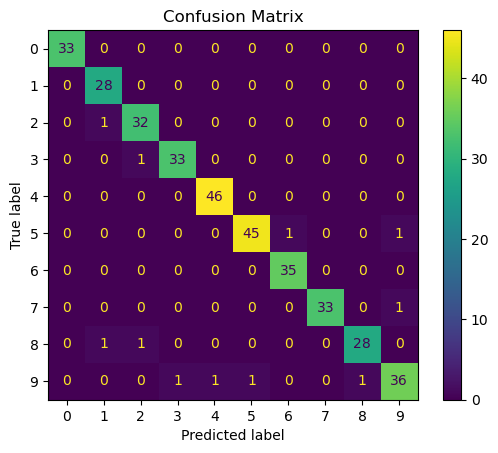

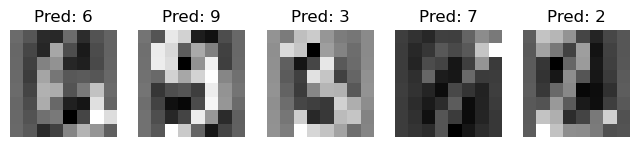

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 2. Load Dataset
digits = load_digits()
X = digits.data
y = digits.target
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 3. Visualize Few Digits
plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

# 4. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Train KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy with K=3:", acc)

# 7. Try Multiple K Values
k_values = [3, 5, 7, 9]
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds))
print("Accuracies:", dict(zip(k_values, accuracies)))

# 8. Plot Accuracy vs K
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.savefig("Accuracy vs K Plot")
plt.show()

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 10. Display 5 Test Images with Predictions
plt.figure(figsize=(8, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')
plt.show()



Dataset shape: (42000, 784)
Columns: Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4'], dtype='object')
⚠️ No 'label' column found. KNN needs labels for training.
Please add a 'label' column to perform classification.


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

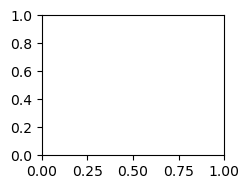

In [45]:
# ================================
# KNN – MNIST CSV Dataset
# ================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 2. Load Dataset
data = pd.read_csv("mnist_dataset.csv")

print("Dataset shape:", data.shape)
print("Columns:", data.columns[:5])

# 3. Check if Label Column Exists
if "label" not in data.columns:
    print("⚠️ No 'label' column found. KNN needs labels for training.")
    print("Please add a 'label' column to perform classification.")
else:
    # Separate Features and Labels
    X = data.drop("label", axis=1)
    y = data["label"]

# 4. Visualize Few Images
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap='gray')
    plt.title(f"Label: {y.iloc[i]}")
    plt.axis('off')
plt.show()

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Train KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy with K=3:", acc)

# 8. Try Multiple K Values
k_values = [3,5,7,9]
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds))

# 9. Plot Accuracy vs K
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.savefig("Accuracy vs K Plot")
plt.show()

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.savefig("Confusion Matrix")
plt.show()

# 11. Show Predictions
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')
plt.show()
